<a href="https://colab.research.google.com/github/umayu06/Object-Detection/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


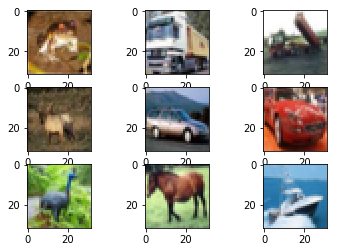

In [1]:
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [0]:
from keras.utils import to_categorical

In [0]:
# load train and test dataset
#def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	#return trainX, trainY, testX, testY

In [0]:
#def prep_pixels(train, test):
	# convert from integers to floats
trainX = trainX.astype('float32')
testX= testX.astype('float32')
	# normalize to range 0-1
trainX = trainX/ 255.0
testX = testX/ 255.0
	# return normalized images
	#return train_norm, test_norm

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.constraints import max_norm
from keras import optimizers

In [7]:
#def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
  model.add(Dropout(0.2))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  # Compile model
  epochs = 25
  lrate = 0.01
  decay = lrate/epochs
  sgd = optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  print(model.summary())
  #return model

W0729 09:02:44.947708 140264286545792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 09:02:44.987519 140264286545792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 09:02:44.996612 140264286545792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 09:02:45.023546 140264286545792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0729 09:02:45.034156 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [8]:
history=model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)
print(history)

W0729 09:02:50.260278 140264286545792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 17s 348us/step - loss: 1.7343 - acc: 0.3749 - val_loss: 1.4388 - val_acc: 0.4907
Epoch 2/25
50000/50000 [==============================] - 10s 209us/step - loss: 1.3718 - acc: 0.5067 - val_loss: 1.3245 - val_acc: 0.5208
Epoch 3/25
50000/50000 [==============================] - 10s 209us/step - loss: 1.2231 - acc: 0.5634 - val_loss: 1.1654 - val_acc: 0.5839
Epoch 4/25
50000/50000 [==============================] - 10s 210us/step - loss: 1.1045 - acc: 0.6058 - val_loss: 1.0800 - val_acc: 0.6193
Epoch 5/25
50000/50000 [==============================] - 10s 209us/step - loss: 1.0171 - acc: 0.6379 - val_loss: 1.0314 - val_acc: 0.6326
Epoch 6/25
50000/50000 [==============================] - 10s 208us/step - loss: 0.9329 - acc: 0.6697 - val_loss: 1.0031 - val_acc: 0.6486
Epoch 7/25
50000/50000 [==============================] - 11s 210us/step - loss: 0.8675 - acc: 0.6943 - val_loss: 0.

In [14]:
acc = model.evaluate(testX, testY, verbose=0)
print(acc)



[1.0563698280334473, 0.6972]


In [0]:
model.save('my_model.h5')

https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

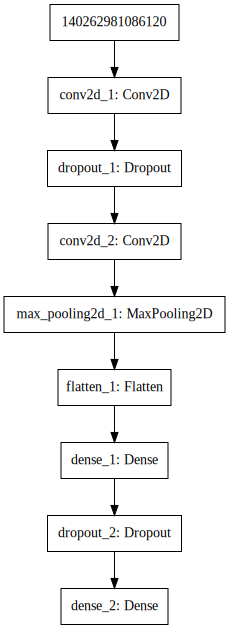

In [19]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))



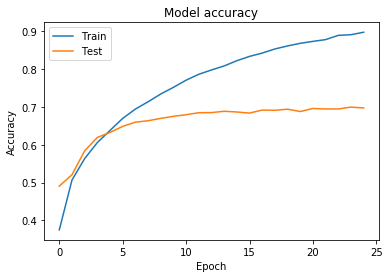

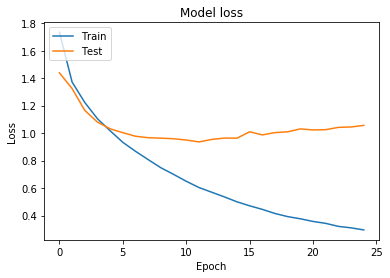

In [17]:
import matplotlib.pyplot as plt

#history = model.fit(trainX, trainY, validation_split=0.25, epochs=50, batch_size=32, verbose=0)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_restore_models.ipynb

In [0]:
model.save_weights('./cifar_10.h5', overwrite=True)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

cifar10: https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

CNN: http://parneetk.github.io/blog/cnn-cifar10/

In [28]:
pip install imageai

     |████████████████████████████████| 153kB 3.4MB/s 


In [29]:
from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(execution_path , "model.h5"))
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "horse-running.jpg"), output_image_path=os.path.join(execution_path , "imagenew.jpg"))

for eachObject in detections:
    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )

W0729 10:43:31.409382 140264286545792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0729 10:43:32.895810 140264286545792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/imageai/Detection/keras_retinanet/backend/tensorflow_backend.py:22: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.



OSError: ignored